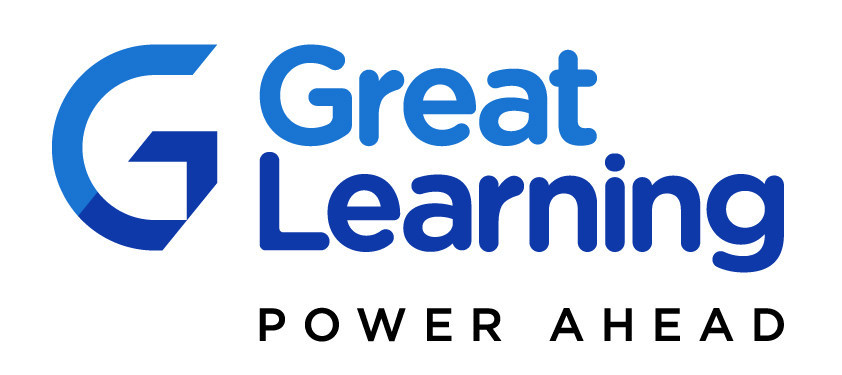

# **GA-NLP Mid-term Project: Support Ticket Categorization**

## **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


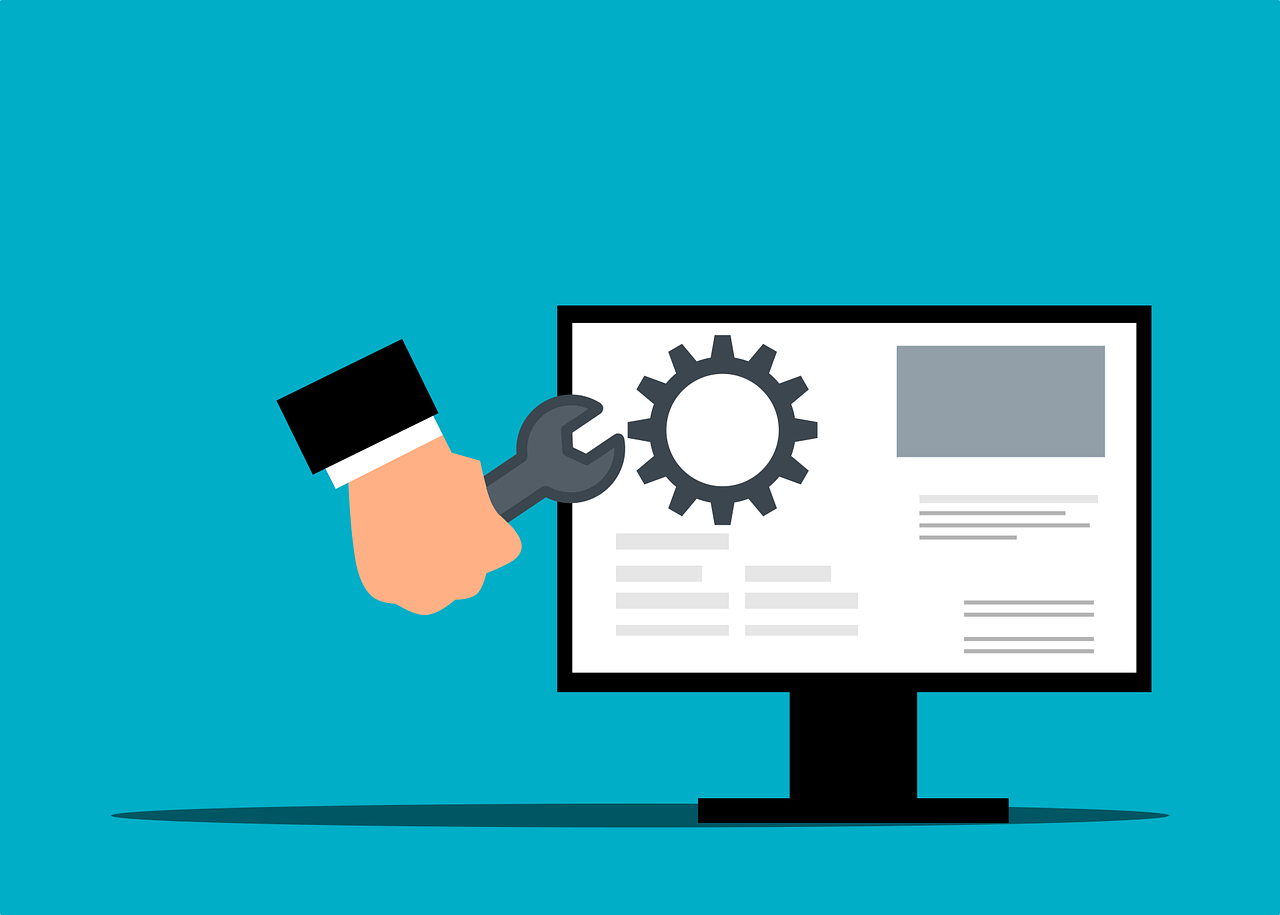

## **Project Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


## **Expected Output**

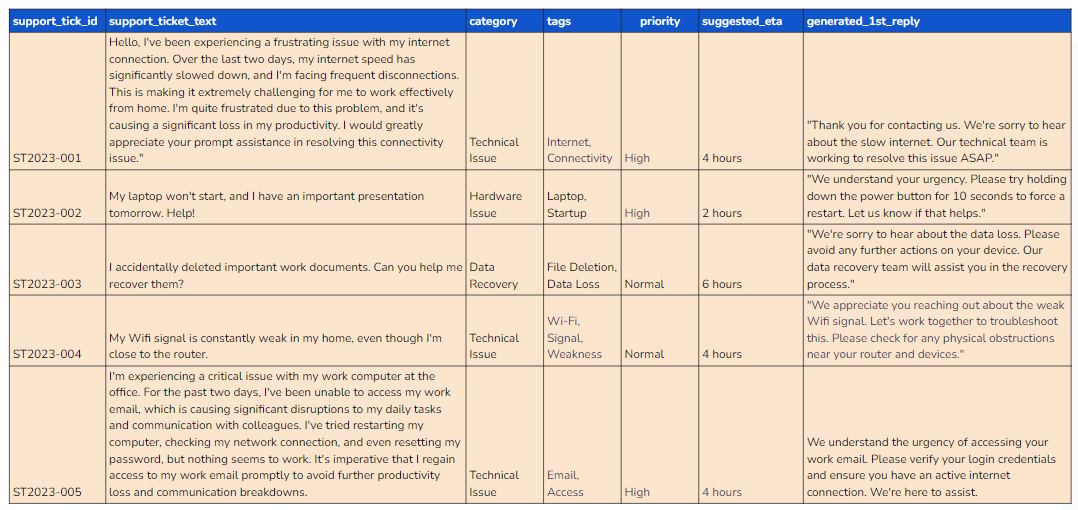

## **Model Loading**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 20.4 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 1.7 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Running command Getting requirements to build wheel
  Getting requirements to build wheel ... done
  Running command pip subprocess to install backend dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.6 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 26.4 MB/s eta 0:00:00
    Creating /tmp/pip-build-env-soy9k4zg/normal/local/bin
    changing mod

In [ ]:
# Install the hugging face hub
!pip install huggingface_hub -q

#!pip install huggingface_hub


### **Q1: Write Python code that imports the 'hf_hub_download' function from the 'huggingface_hub' library and also imports the 'Llama' class from the 'llama_cpp' library.**
### **Ensure that the code is correctly formatted and ready for execution.** **(5 Marks)**

In [ ]:
#!apt-get update
#!apt-get install nvidia-cuda-toolkit

In [ ]:
# Import the 'hf_hub_download' function from the 'huggingface_hub' library
from huggingface_hub import hf_hub_download

# Import the 'Llama' class from the 'llama_cpp' library
from llama_cpp import Llama

In [ ]:
# Define the model name or path as a string (You can find this info from hugging face website)

model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"

# Define the model basename as a string, indicating it's in the gguf format

model_basename =  "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

# from GA_NLP_MLS_5_LangChain_Agent_Chatbot_Prototype_.ipynb
#model_name_or_path = "TheBloke/Llama-2-7B-chat-GGUF"
#model_basename = "llama-2-7b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Download the model from the Hugging Face Hub using the 'hf_hub_download' function
# by specifying the 'repo_id' and 'filename'

model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
# Create an instance of the 'Llama' class with specified parameters
# remove the blank spaces and complete the code

lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,  # CPU cores
        n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
        n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
        n_ctx=4096,  # Context window
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### **Q2: Define the System Message** **(7 Marks)**

Write a Python function called **generate_llama_response** that takes a single parameter, support_ticket_text, which represents the user's support ticket text. Inside the function, you should perform the following tasks:

Define a system message as a string and assign it to the variable system_message.

- **Combine the support_ticket_text and system_message to create a prompt string.**

*Generate a response from the LLaMA model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 256.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing 'INST'.
- echo should be set to False.
Extract and return the response text from the generated response.

Don't forget to provide a value for the system_message variable before using it in the function.



*What content and instructions should be included in the system message to guide the technical assistant when processing support tickets? Please provide a detailed description of the information and guidelines that the system message should contain.*

Here's a detailed breakdown of what should be included:

- **Introduction (System Role):** Begin with an introductory statement that establishes the role of the system message. In this case, it's acting as a guide for a technical assistant.

- **Ticket Categorization:** Explain the primary task of the technical assistant, which is to classify the support ticket into specific categories. In this example, the categories are:
    - Technical Issues
    - Hardware Issues
    - Data Recovery

- **Response Options:** Clearly state that the assistant should only respond with one of the predefined categories, emphasizing that other responses are not acceptable.

- **Sub-Tasks:** Outline the secondary tasks that the technical assistant should perform once the category is identified. These sub-tasks include:
  - **Creating Tags:** Instruct the assistant to create tags that will help further classify the ticket.
  - **Assigning Priority:** Specify that the assistant should assign a priority level (e.g., "High" or "Normal") based on their understanding of the text.
  - **Suggesting ETA:** Guide the assistant to provide an estimated time for
resolving the issue mentioned in the ticket.
  - **Generating 1st Reply (Sentiment-Based):** Emphasize the importance of crafting a response that aligns with the sentiment expressed in the ticket.

- **General Instructions:** Offer general instructions that should be followed throughout the ticket processing, such as:

  - **Categorization:** Reiterate that the assistant should categorize the ticket only into the predefined categories.
  - **Reading Carefully:** Stress the importance of reading the support ticket text thoroughly and considering the overall sentiment before responding.
  - **Tone:** Emphasize that the tone of all responses should be polite and professional.
  - **Output Format:** Clearly specify the desired output format for the responses generated by the assistant. In this case, the output should be in JSON format.

##### **The output of the model should be in JSON format**

In [ ]:
### Below I am shaing some of the tries of system_message I used.
### I finally decided to use the one shared by the Academic Support Team, but by the the the time I received it, I already figure out
### a way to convert output of my system_message into JSON files (using custom function)
### system_message_1, system_message_2, system_message_3, system_message_4 and system_message_5 are here just to show what I've tried in the past
### those aren't messages used anywhere in this notebook

In [ ]:
 system_message_1 = """

[INST]<<SYS>>

You are a technical assistant that automates the classification and processing of support tickets.
Please process the user's support tickets,identify its sentiment, and respond appropriately, always maintaining a polite and helpful tone.

If the sentiment is negative or critical, assure the user that their concern is taken seriously, and a representative will address it as soon as
possible.
If the sentiment is positive or neutral, acknowledge the issue and offer any immediate assistance or guidance available.

Your goal is to extract key information from the support ticket and predict ticket categories, assign priority, suggest estimated resolution times,
generate responses based on sentiment analysis, and store results in a structured DataFrame (JSON format).
You should craft a response that aligns with sentiment expressed in the ticket.

Extract the below information from the above tickets to output a JSON with the below headers:

1. category: Assign only one category to the issue , choose one of "Technical Issue", "Hardware Issue", "Data Recovery"
2. tags: create the tags that will help further classify the ticket
3. priority: assign only one priority "High", "Normal", based on the understanding of the text
4. suggested_eta: provide an estimated time for resolving the issue mentioned in the ticket, this has to be a number in hours

<</SYS>>[/INST]
"""


In [ ]:
system_message_2= """

[INST]<<SYS>>

You are a technical assistants that automates the classification and processing of support tickets.

Your goal is to extract key information from the user message into JSO format and classify support ticket into specific categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis,
 and store results in a structured DataFrame (strictly JSON format).

Go through the support ticket text step by step, and generate a structured output for further analysis by
the product analyst in the below JSON format

{
 "support_tick_id": <extract it from the corput, for example "ST2023-001">,
"category": <assign only one category to the issue , chose one of "Technical Issue", "Hardware Issue", "Data Recovery">,
"tags”: <create the tags that will help further classify the ticket>,
"priority": <assign only one priority "High", "Normal", based on the understanding of the text>,
"suggested_eta": <provide an estimated time for resolving the issue mentioned in the ticket, this has to be a number in hours>,
"generated_1st_reply": <you recommendation to solve the issue, sentiment based>
}

Here are some previous examples of support tickets and Assistant's output:

support_tick_id_ST2023-001: "Hello, I've been experiencing a frustrating issue with my internet connection. Over the last two day, my internet speed has significantly slowed down, and I.m facing frequent disconnections. This is making it extremely challenging for me to work effectively from home. I'm quite frustrated due to this problem, and it's causing a significant loss in my productivity. I would greatly appreciate your prompt assistance in resolving this connectivity issue"
Assistant:
{"support_tick_id": "ST2023-001",
  "category": "Technical Issue",
  "tags": "Internet, Connectivity",
  "priority": "High",
  "suggested_eta": "4 hours",
 "generated_1st_reply": "Thank you for contacting us. We're sorry to hear about the slow internet. Our technical team is working to resolve this issue ASAP."
}

support_tick_id_ST2023-002: "My laptop won't start, and I have an important presentation tomorrow. Help!"
Assistant:
{"support_tick_id": "ST2023-002",
  "category": "Hardware Issue",
  "tags": "Laptop, Startup",
  "priority": "High",
  "suggested_eta": "2 hours",
  "generated_1st_reply": "We understand your urgency. Please try holding down the power button for 10 seconds to force a restart. Let us know if that helps."
}

support_tick_id_ST2023-003: "I accidentally deleted important work documents. Can you help me recover them?"
Assistant:
{{ "support_tick_id": "ST2023-003",
 "category": "Data Recovery",
 "tags": "File Deletion, Data Loss",
 "priority": "Normal",
 "suggested_eta": "6 hours",
 "generated_1st_reply": "We 're sorry to hear about the data loss. Please avoid any further actions on your device. Our data recovery team will assist you with the recovery process."
}

support_tick_id_ST2023-004: "My Wifi signal is constantly weak in my home, even those I'm close to the router."
Assistant:
{
"support_tick_id": "ST2023-004",
"category": "Technical Issue",
"tags": "Wi-Fi, Signal, Weakness",
"priority": "Normal",
"suggested_eta": "4 hours",
"generated_1st_reply": "We appreciate you reaching out about the weak Wifi signal. Let's work together to troubleshoot this. Please check for any physical obstructions near your router and devices."
}

support_tick_id_ST2023-005: "I'm experiencing a critical issue with my work computer at the office. For the past two days, I've been unable to access my work email, which is causing significant disruptions to my daily tasks and communication with colleagues. I've tried restarting my computer, checking my network connection, and even resetting my password, but nothing seems to work. It's imperative that I regain access to my work email promptly to avoid further productivity loss and communication breakdowns."
Assistant:
{
"support_tick_id": "ST2023-005",
"category": "Technical Issue",
"tags": "Email, Access",
"priority": "High",
"suggested_eta": "4 hours",
"generated_1st_reply": "We understand the urgency of accessing your work email. Please verify your login credential and ensure you have an active internet connection. We're here to assist"
}
<</SYS>>[/INST]

"""

In [ ]:


# System message
system_message_3 = """
    [INST]<<SYS>> You are a technical assistants that automates the classification and processing of support tickets.

Your goal is to extract key information from the support ticket text strictly into JSON format and classify support ticket into specific categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis,
 and store results in a structured DataFrame (strictly JSON format).

Go through the support ticket text step by step, and generate a structured output for further analysis by
the product analyst in the below JSON format

{
"support_tick_id": <extract it from the corput, for example "ST2023-001">,
"category": <assign only one category to the issue , chose one of "Technical Issue", "Hardware Issue", "Data Recovery">,
"tags”: <create the tags that will help further classify the ticket>,
"priority": <assign only one priority "High", "Normal", based on the understanding of the text>,
"suggested_eta": <provide an estimated time for resolving the issue mentioned in the ticket, this has to be a number in hours>,
"generated_1st_reply": <you recommendation to solve the issue, sentiment based>
}
<</SYS>>[/INST]
    """



In [ ]:
system_message_4 = """

[INST]<<SYS>>

You are a technical assistant that automates the classification and processing of support tickets.

Your goal is to extract key information from the support ticket text strictly into JSON format and classify support ticket into specific categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis,
 and store results in a structured DataFrame (strictly JSON format).

Go through the support ticket text step by step, and generate a structured output for further analysis by
the product analyst in the below JSON format

{
"category": <assign only one category to the issue , chose one of "Technical Issue", "Hardware Issue", "Data Recovery">,
"tags”: <create the tags that will help further classify the ticket>,
"priority": <assign only one priority "High", "Normal", based on the understanding of the text>,
"suggested_eta": <provide an estimated time for resolving the issue mentioned in the ticket, this has to be a number in hours>,
"generated_1st_reply": <you recommendation to solve the issue, sentiment based>
}

Output ONLY JSON format, no extra text needed.

Here are some examples of support tickets and Assistant's output:

support_ticket_text: "Hello, I've been experiencing a frustrating issue with my internet connection. Over the last two day, my internet speed has significantly slowed down, and I.m facing frequent disconnections. This is making it extremely challenging for me to work effectively from home. I'm quite frustrated due to this problem, and it's causing a significant loss in my productivity. I would greatly appreciate your prompt assistance in resolving this connectivity issue"

Assistant: '''json
{{
  "category": "Technical Issue",
  "tags": "Internet, Connectivity",
  "priority": "High",
  "suggested_eta": "4 hours",
  "generated_1st_reply": "Thank you for contacting us. We're sorry to hear about the slow internet. Our technical team is working to resolve this issue ASAP."
}}
'''

support_ticket_text:  "My laptop won't start, and I have an important presentation tomorrow. Help!"

Assistant: '''json
{{
  "category": "Hardware Issue",
  "tags": "Laptop, Startup",
  "priority": "High",
  "suggested_eta": "2 hours",
  "generated_1st_reply": "We understand your urgency. Please try holding down the power button for 10 seconds to force a restart. Let us know if that helps."
}}
'''

support_ticket_text: "I accidentally deleted important work documents. Can you help me recover them?"

Assistant: '''json
{{
 "category": "Data Recovery",
 "tags": "File Deletion, Data Loss",
 "priority": "Normal",
 "suggested_eta": "6 hours",
 "generated_1st_reply": "We 're sorry to hear about the data loss. Please avoid any further actions on your device. Our data recovery team will assist you with the recovery process."
}}
'''

support_ticket_text: "My Wifi signal is constantly weak in my home, even those I'm close to the router."

Assistant: '''json
{{
"category": "Technical Issue",
"tags": "Wi-Fi, Signal, Weakness",
"priority": "Normal",
"suggested_eta": "4 hours",
"generated_1st_reply": "We appreciate you reaching out about the weak Wifi signal. Let's work together to troubleshoot this. Please check for any physical obstructions near your router and devices."
}}
'''

support_ticket_text: "I'm experiencing a critical issue with my work computer at the office. For the past two days, I've been unable to access my work email, which is causing significant disruptions to my daily tasks and communication with colleagues. I've tried restarting my computer, checking my network connection, and even resetting my password, but nothing seems to work. It's imperative that I regain access to my work email promptly to avoid further productivity loss and communication breakdowns."

Assistant: '''json
{{
"category": "Technical Issue",
"tags": "Email, Access",
"priority": "High",
"suggested_eta": "4 hours",
"generated_1st_reply": "We understand the urgency of accessing your work email. Please verify your login credential and ensure you have an active internet connection. We're here to assist"
}}
'''
<</SYS>>[/INST]

"""




In [ ]:
system_message_5 = """

[INST]<<SYS>>

You are a technical assistant that automates the classification and processing of support tickets.

Your goal is to extract key information from the support ticket text strictly into JSON format and classify support ticket into specific categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis,
 and store results in a structured DataFrame (strictly JSON format).

The output should be in the form of a JSON object containing the following information for each support ticket:

1. category (assign only one category to the issue , chose one of "Technical Issue", "Hardware Issue", "Data Recovery")
2. tags (create the tags that will help further classify the ticket)
3. priority (assign only one priority "High", "Normal", based on the understanding of the text)
3. suggested_eta (provide an estimated time for resolving the issue mentioned in the ticket, this has to be a number in hours)
4. generated_1st_reply (you recommendation to solve the issue, sentiment based)

Here are some examples of support tickets and Assistant's output:

support_ticket_text: "Hello, I've been experiencing a frustrating issue with my internet connection. Over the last two day, my internet speed has significantly slowed down, and I.m facing frequent disconnections. This is making it extremely challenging for me to work effectively from home. I'm quite frustrated due to this problem, and it's causing a significant loss in my productivity. I would greatly appreciate your prompt assistance in resolving this connectivity issue"

Assistant: '''json
{{
  "category": "Technical Issue",
  "tags": "Internet, Connectivity",
  "priority": "High",
  "suggested_eta": "4 hours",
  "generated_1st_reply": "Thank you for contacting us. We're sorry to hear about the slow internet. Our technical team is working to resolve this issue ASAP."
}}
'''

support_ticket_text:  "My laptop won't start, and I have an important presentation tomorrow. Help!"

Assistant: '''json
{{
  "category": "Hardware Issue",
  "tags": "Laptop, Startup",
  "priority": "High",
  "suggested_eta": "2 hours",
  "generated_1st_reply": "We understand your urgency. Please try holding down the power button for 10 seconds to force a restart. Let us know if that helps."
}}
'''

support_ticket_text: "I accidentally deleted important work documents. Can you help me recover them?"

Assistant: '''json
{{
 "category": "Data Recovery",
 "tags": "File Deletion, Data Loss",
 "priority": "Normal",
 "suggested_eta": "6 hours",
 "generated_1st_reply": "We 're sorry to hear about the data loss. Please avoid any further actions on your device. Our data recovery team will assist you with the recovery process."
}}
'''

support_ticket_text: "My Wifi signal is constantly weak in my home, even those I'm close to the router."

Assistant: '''json
{{
"category": "Technical Issue",
"tags": "Wi-Fi, Signal, Weakness",
"priority": "Normal",
"suggested_eta": "4 hours",
"generated_1st_reply": "We appreciate you reaching out about the weak Wifi signal. Let's work together to troubleshoot this. Please check for any physical obstructions near your router and devices."
}}
'''

support_ticket_text: "I'm experiencing a critical issue with my work computer at the office. For the past two days, I've been unable to access my work email, which is causing significant disruptions to my daily tasks and communication with colleagues. I've tried restarting my computer, checking my network connection, and even resetting my password, but nothing seems to work. It's imperative that I regain access to my work email promptly to avoid further productivity loss and communication breakdowns."

Assistant: '''json
{{
"category": "Technical Issue",
"tags": "Email, Access",
"priority": "High",
"suggested_eta": "4 hours",
"generated_1st_reply": "We understand the urgency of accessing your work email. Please verify your login credential and ensure you have an active internet connection. We're here to assist"
}}
'''
<</SYS>>[/INST]

"""





In [ ]:
system_message_6 = """

[INST]<<SYS>>

You are a technical assistant that automates the classification and processing of support tickets.

The output should be in the form of a JSON object containing the following information for each support ticket:

1. category (assign only one category to the issue , chose one of "Technical Issue", "Hardware Issue", "Data Recovery")
2. tags (create the tags that will help further classify the ticket)
3. priority (assign only one priority "High", "Normal", based on the understanding of the text)
3. suggested_eta (provide an estimated time for resolving the issue mentioned in the ticket, this has to be a number in hours)
4. generated_1st_reply (you recommendation to solve the issue, sentiment based)

<</SYS>>[/INST]

"""

In [ ]:
system_message_7 = """[INST]<<SYS>>
    Act as a Technical Categorization Assistant and follow the instructions:
          A) Your primary task is to categorize support tickets into predefined categories: Technical Issues, Hardware Issues, or Data Recovery
          B) Respond with only one of the predefined categories; other responses are not acceptable
          C) Once a category is identified:
          1.create relevant tags: Internet, Connectivity, Laptop, Startup, File Deletion, Data Loss, Wi-Fi, Signal, Weakness, Email, Access, Battery, Blue Screen, USB
          2. assign a priority level: High, Normal, Low
          3. suggest an estimated time for issue resolution
          4. generate a first reply that aligns with the sentiment expressed in the ticket.Maintain a polite and professional tone
          - Strictly Provide all responses in the following JSON format:
            {
              "category": "...",
              "tags": [...],
              "priority": "...",
              "suggested_eta": "...",
              "generated_1st_reply": "..."
             }
          D) Compulsury to generate response in the above JSON format. If not in correct format , regenerate it in above mentioned json format

          <</SYS>>[/INST]"""

In [ ]:
# I've tried all of the above system messages and got a pretty good result using system_message_6, however in order to get JSON formet I had to modify the json function

# I could just change the function and add another parameter/argument that would be system_message and just call the function with different system-massage argument

In [ ]:
def generate_llama_response(support_ticket_text):

  # special tokens used by llama 2 chat


    # System message from MLS4_Intro_to_GenAI_&_Prompt_engineering_hands_on_-1.ipynb
    # System message

    # As per recommendation from the Accedamic Support Team
    system_message = """[INST]<<SYS>>
    Act as a Technical Categorization Assistant and follow the instructions:
          A) Your primary task is to categorize support tickets into predefined categories: Technical Issues, Hardware Issues, or Data Recovery
          B) Respond with only one of the predefined categories; other responses are not acceptable
          C) Once a category is identified:
          1.create relevant tags: Internet, Connectivity, Laptop, Startup, File Deletion, Data Loss, Wi-Fi, Signal, Weakness, Email, Access, Battery, Blue Screen, USB
          2. assign a priority level: High, Normal, Low
          3. suggest an estimated time for issue resolution
          4. generate a first reply that aligns with the sentiment expressed in the ticket.Maintain a polite and professional tone
          - Strictly Provide all responses in the following JSON format:
            {
              "category": "...",
              "tags": [...],
              "priority": "...",
              "suggested_eta": "...",
              "generated_1st_reply": "..."
             }
          D) Compulsury to generate response in the above JSON format. If not in correct format , regenerate it in above mentioned json format

          <</SYS>>[/INST]"""


    # Combine user_prompt and system_message to create the prompt

    prompt = f"{system_message}\n{support_ticket_text}"

    #prompt = f"{support_ticket_text}\n{system_message}" #from LVC4_GenAI_NLP_Prompt_Engineering.ipynb

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=256,
        #max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]  ### Fill in the blank
    return response_text



In [ ]:
### this will be function that generates llama response without the examples  in the system message
def generate_llama_response_2(support_ticket_text):

  # special tokens used by llama 2 chat


    # System message from MLS4_Intro_to_GenAI_&_Prompt_engineering_hands_on_-1.ipynb
    # System message

    # As per recommendation from the Accedamic Support Team
    system_message = """[INST]<<SYS>>
    Act as a Technical Categorization Assistant and follow the instructions:
          A) Your primary task is to categorize support tickets into predefined categories: Technical Issues, Hardware Issues, or Data Recovery
          B) Respond with only one of the predefined categories; other responses are not acceptable
          C) Once a category is identified:
          1.create relevant tags: Internet, Connectivity, Laptop, Startup, File Deletion, Data Loss, Wi-Fi, Signal, Weakness, Email, Access, Battery, Blue Screen, USB
          2. assign a priority level: High, Normal, Low
          3. suggest an estimated time for issue resolution
          4. generate a first reply that aligns with the sentiment expressed in the ticket.Maintain a polite and professional tone
          - Strictly Provide all responses in the following JSON format:
            {
              "category": "...",
              "tags": [...],
              "priority": "...",
              "suggested_eta": "...",
              "generated_1st_reply": "..."
             }
          D) Compulsury to generate response in the above JSON format. If not in correct format , regenerate it in above mentioned json format

          Here are some examples of support tickets and Assistant's output:

support_ticket_text: "Hello, I've been experiencing a frustrating issue with my internet connection. Over the last two day, my internet speed has significantly slowed down, and I.m facing frequent disconnections. This is making it extremely challenging for me to work effectively from home. I'm quite frustrated due to this problem, and it's causing a significant loss in my productivity. I would greatly appreciate your prompt assistance in resolving this connectivity issue"

Assistant: '''json
{{
  "category": "Technical Issue",
  "tags": "Internet, Connectivity",
  "priority": "High",
  "suggested_eta": "4 hours",
  "generated_1st_reply": "Thank you for contacting us. We're sorry to hear about the slow internet. Our technical team is working to resolve this issue ASAP."
}}
'''

support_ticket_text:  "My laptop won't start, and I have an important presentation tomorrow. Help!"

Assistant: '''json
{{
  "category": "Hardware Issue",
  "tags": "Laptop, Startup",
  "priority": "High",
  "suggested_eta": "2 hours",
  "generated_1st_reply": "We understand your urgency. Please try holding down the power button for 10 seconds to force a restart. Let us know if that helps."
}}
'''

support_ticket_text: "I accidentally deleted important work documents. Can you help me recover them?"

Assistant: '''json
{{
 "category": "Data Recovery",
 "tags": "File Deletion, Data Loss",
 "priority": "Normal",
 "suggested_eta": "6 hours",
 "generated_1st_reply": "We 're sorry to hear about the data loss. Please avoid any further actions on your device. Our data recovery team will assist you with the recovery process."
}}
'''

support_ticket_text: "My Wifi signal is constantly weak in my home, even those I'm close to the router."

Assistant: '''json
{{
"category": "Technical Issue",
"tags": "Wi-Fi, Signal, Weakness",
"priority": "Normal",
"suggested_eta": "4 hours",
"generated_1st_reply": "We appreciate you reaching out about the weak Wifi signal. Let's work together to troubleshoot this. Please check for any physical obstructions near your router and devices."
}}
'''

support_ticket_text: "I'm experiencing a critical issue with my work computer at the office. For the past two days, I've been unable to access my work email, which is causing significant disruptions to my daily tasks and communication with colleagues. I've tried restarting my computer, checking my network connection, and even resetting my password, but nothing seems to work. It's imperative that I regain access to my work email promptly to avoid further productivity loss and communication breakdowns."

Assistant: '''json
{{
"category": "Technical Issue",
"tags": "Email, Access",
"priority": "High",
"suggested_eta": "4 hours",
"generated_1st_reply": "We understand the urgency of accessing your work email. Please verify your login credential and ensure you have an active internet connection. We're here to assist"
}}

          <</SYS>>[/INST]"""


    # Combine user_prompt and system_message to create the prompt

    prompt = f"{system_message}\n{support_ticket_text}"

    #prompt = f"{support_ticket_text}\n{system_message}" #from LVC4_GenAI_NLP_Prompt_Engineering.ipynb

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=256,
        #max_tokens=512,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]  ### Fill in the blank
    return response_text



In [ ]:
# I was thinking about creating simiar function to the above one but with 2 parameters

#def generate_llama_response_MW(support_ticket_text,system_message):

    # Combine user_prompt and system_message to create the prompt

#    prompt = f"{system_message}\n{support_ticket_text}"

    #prompt = f"{support_ticket_text}\n{system_message}" #from LVC4_GenAI_NLP_Prompt_Engineering.ipynb

    # Generate a response from the LLaMA model
#    response = lcpp_llm(
#        prompt=prompt,
#        max_tokens=256,
#        #max_tokens=512,
#        temperature=0,
#        top_p=0.95,
#        repeat_penalty=1.2,
#        top_k=50,
#        stop=['INST'],
#        echo=False
#    )

    # Extract and return the response text
#    response_text = response["choices"][0]["text"]  ### Fill in the blank
#    return response_text


### **Q3: Loading our Dataset (2 Marks)**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

# Read a CSV file into a DataFrame and store it in the 'data' variable
data = pd.read_csv('/content/drive/MyDrive/Support_ticket_text_data_mid_term.csv')

In [ ]:
print(data.shape)
print(data.head())

(21, 2)
  support_tick_id                                support_ticket_text
0      ST2023-006  My internet connection has significantly slowe...
1      ST2023-007  Urgent help required! My laptop refuses to sta...
2      ST2023-008  I've accidentally deleted essential work docum...
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...
4      ST2023-010  My smartphone battery is draining rapidly, eve...


- After reading the CSV file into the 'data' DataFrame, how can you determine the shape of the DataFrame, and what information does 'data.shape' provide?

- What does 'data.head()' do, and how can it be used to inspect the contents of the DataFrame?

##Answers

- 'data.shape' provides the dimentiones of the data, we can see that our data set has 2 columns and 21 rows.

- 'data.head()' shows us first 5 rows of the data (or any other amount using the paramer, 5 is just a default), it can be used to inspect the data, check if the data output is in the desired form.

### **Q4: Create a new column in the DataFrame called 'llama_response' and populate it with responses generated by applying the 'generate_llama_response' function to each 'support_ticket_text' in the DataFrame ( 5Marks)**

In [ ]:
# Apply a function to each element in the 'support_ticket_text' column of the DataFrame 'data'
# The applied function, in this case, is a lambda function.

#from llama_cpp import Llama

#print(data.head())

data['llama_response'] = data['support_ticket_text'].apply(lambda x: generate_llama_response(x))


#print(data.head())

# The lambda function takes a single argument 'x', representing each individual 'support_ticket_text' in the column.

# Inside the lambda function:
# - 'generate_llama_response(x)' is called to generate a response based on the 'support_ticket_text'.
# - The result of 'generate_llama_response(x)' is assigned to a new column called 'llama_response' in the DataFrame 'data'.

# Example - data['llama_response'] = data['support_ticket_text'].apply(lambda x: generate_llama_response(x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# using function generate_llama_response_2 to compare the output, this one has examples in the system_message
data['llama_response_2'] = data['support_ticket_text'].apply(lambda x: generate_llama_response_2(x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# data['llama_response_3'] = (data['support_ticket_text'],system_message_1).apply(lambda x, y: generate_llama_response_MW(x,y))

In [ ]:
## Check the new_column added
data.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_2
0,ST2023-006,My internet connection has significantly slowe...,"\n\nHere is my response: \n\n{ \n""category"": ...",\n\nHere is the response of the Technical Cat...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. \n\nHere is the categori...,as soon as possible. Thank you.\n\nHere is th...
2,ST2023-008,I've accidentally deleted essential work docum...,\n\nHere is the categorization of your suppor...,What is the estimated time for issue resoluti...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n\nHere is your ticket categorized:\n{\n""cat...",\n\nHere is the response from the Technical Ca...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","\n\nHere's my response: \n\n{\n""category"": ""Ha...",\n\nHere's the response from the Technical Cat...


In [ ]:
data2 = data[['support_tick_id','support_ticket_text','llama_response_2']]

In [ ]:
data2.head()

,support_tick_id,support_ticket_text,llama_response_2
0,ST2023-006,My internet connection has significantly slowe...,\n\nHere is the response of the Technical Cat...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. Thank you.\n\nHere is th...
2,ST2023-008,I've accidentally deleted essential work docum...,What is the estimated time for issue resoluti...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,\n\nHere is the response from the Technical Ca...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",\n\nHere's the response from the Technical Cat...


### **Q5: Prepare the dataset in the desired format** **(6 Marks)**

- Run the code specified in the cells

In [ ]:
import json

In [ ]:
# As per recommendation from the Accedamic Support Team
def extract_json_from_string(input_str):
    try:
        # Find the starting index of JSON object in the string by looking for the first curly brace
        json_start_index = input_str.find('{')
        # If a curly brace is found
        if json_start_index != -1:
            # Attempt to extract and parse the JSON substring
            json_str = input_str[json_start_index:]
            json_data = json.loads(json_str)
            return json_data
        else:
            return None
    except json.JSONDecodeError:
        # Return None if parsing fails
        return None

# Apply the function to the 'llama_response' column
data['llama_response_parsed'] = data['llama_response'].apply(extract_json_from_string)
data['llama_response_parsed_2'] = data['llama_response_2'].apply(extract_json_from_string)

data2['llama_response_parsed'] = data2['llama_response_2'].apply(extract_json_from_string)

<ipython-input-26-4e763cbee5ab>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['llama_response_parsed'] = data2['llama_response_2'].apply(extract_json_from_string)


In [ ]:
# As per recommendation from the Accedamic Support Team
def extract_json_from_string(input_str):
    try:
        # Find the starting index of JSON object in the string by looking for the first curly brace
        json_start_index = input_str.find('{')
        # If a curly brace is found
        if json_start_index != -1:
            # Attempt to extract and parse the JSON substring
            json_str = input_str[json_start_index:]
            json_data = json.loads(json_str)
            return json_data
        else:
            return None
    except json.JSONDecodeError:
        # Return None if parsing fails
        return None


#data['llama_response_parsed_2'] = data['llama_response_2'].apply(extract_json_from_string)

In [ ]:
# This one is the dafault function that was already in the motebook but I Am not using this one
# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

# Apply the function to the 'llama_response' column
#data['llama_response_parsed'] = data['llama_response'].apply(extract_json_data)

In [ ]:
data

,support_tick_id,support_ticket_text,llama_response,llama_response_2,llama_response_parsed,llama_response_parsed_2
0,ST2023-006,My internet connection has significantly slowe...,"\n\nHere is my response: \n\n{ \n""category"": ...",\n\nHere is the response of the Technical Cat...,"{'category': 'Internet', 'tags': ['Connectivit...",None
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. \n\nHere is the categori...,as soon as possible. Thank you.\n\nHere is th...,"{'category': 'Hardware Issues', 'tags': ['Lapt...","{'category': 'Hardware Issue', 'tags': ['Lapto..."
2,ST2023-008,I've accidentally deleted essential work docum...,\n\nHere is the categorization of your suppor...,What is the estimated time for issue resoluti...,"{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n\nHere is your ticket categorized:\n{\n""cat...",\n\nHere is the response from the Technical Ca...,"{'category': 'Hardware Issues', 'tags': ['Wi-F...","{'category': 'Technical Issue', 'tags': ['Wi-F..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","\n\nHere's my response: \n\n{\n""category"": ""Ha...",\n\nHere's the response from the Technical Cat...,"{'category': 'Hardware Issues', 'tags': ['Batt...","{'category': 'Hardware Issue', 'tags': 'Batter..."
5,ST2023-011,I'm locked out of my online banking account an...,"I have tried to reset my password using the ""...","I cannot access the ""forgot password"" option ...","{'category': 'Technical Issues', 'tags': ['Int...","{'category': 'Technical Issue', 'tags': ['Onli..."
6,ST2023-012,"My computer's performance is sluggish, severel...",Please assist me with this issue as soon as p...,"\n\nResponse:\n\n{{\n ""category"": ""Technical ...","{'category': 'Technical Issues', 'tags': ['Per...",None
7,ST2023-013,I'm experiencing a recurring blue screen error...,\n\nHere is the categorization of your suppor...,Can I get some assistance?\n\nHere is the res...,"{'category': 'Hardware Issues', 'tags': ['Blue...","{'category': 'Hardware Issue', 'tags': ['Lapto..."
8,ST2023-014,My external hard drive isn't being recognized ...,\n\nHere is the categorization of your suppor...,Can you help me? \n\nHere is the response fro...,"{'category': 'Data Recovery', 'tags': ['Extern...","{'category': 'Data Recovery', 'tags': ['File D..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,\n\nHere is the categorization of your suppor...,I would appreciate your prompt assistance so ...,"{'category': 'Hardware Issues', 'tags': ['Grap...","{'category': 'Hardware Issue', 'tags': ['Lapto..."


In [ ]:
data3 = data

In [ ]:
data3['llama_response_parsed_2'][data3['llama_response_parsed_2'].isnull()] = data3['llama_response_parsed']

In [ ]:
### I'll use comuln llama_response_parsed_2 from data 3
data3

,support_tick_id,support_ticket_text,llama_response,llama_response_2,llama_response_parsed,llama_response_parsed_2
0,ST2023-006,My internet connection has significantly slowe...,"\n\nHere is my response: \n\n{ \n""category"": ...",\n\nHere is the response of the Technical Cat...,"{'category': 'Internet', 'tags': ['Connectivit...","{'category': 'Internet', 'tags': ['Connectivit..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. \n\nHere is the categori...,as soon as possible. Thank you.\n\nHere is th...,"{'category': 'Hardware Issues', 'tags': ['Lapt...","{'category': 'Hardware Issue', 'tags': ['Lapto..."
2,ST2023-008,I've accidentally deleted essential work docum...,\n\nHere is the categorization of your suppor...,What is the estimated time for issue resoluti...,"{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n\nHere is your ticket categorized:\n{\n""cat...",\n\nHere is the response from the Technical Ca...,"{'category': 'Hardware Issues', 'tags': ['Wi-F...","{'category': 'Technical Issue', 'tags': ['Wi-F..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","\n\nHere's my response: \n\n{\n""category"": ""Ha...",\n\nHere's the response from the Technical Cat...,"{'category': 'Hardware Issues', 'tags': ['Batt...","{'category': 'Hardware Issue', 'tags': 'Batter..."
5,ST2023-011,I'm locked out of my online banking account an...,"I have tried to reset my password using the ""...","I cannot access the ""forgot password"" option ...","{'category': 'Technical Issues', 'tags': ['Int...","{'category': 'Technical Issue', 'tags': ['Onli..."
6,ST2023-012,"My computer's performance is sluggish, severel...",Please assist me with this issue as soon as p...,"\n\nResponse:\n\n{{\n ""category"": ""Technical ...","{'category': 'Technical Issues', 'tags': ['Per...","{'category': 'Technical Issues', 'tags': ['Per..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,\n\nHere is the categorization of your suppor...,Can I get some assistance?\n\nHere is the res...,"{'category': 'Hardware Issues', 'tags': ['Blue...","{'category': 'Hardware Issue', 'tags': ['Lapto..."
8,ST2023-014,My external hard drive isn't being recognized ...,\n\nHere is the categorization of your suppor...,Can you help me? \n\nHere is the response fro...,"{'category': 'Data Recovery', 'tags': ['Extern...","{'category': 'Data Recovery', 'tags': ['File D..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,\n\nHere is the categorization of your suppor...,I would appreciate your prompt assistance so ...,"{'category': 'Hardware Issues', 'tags': ['Grap...","{'category': 'Hardware Issue', 'tags': ['Lapto..."


In [ ]:
# MW my function. to extract JSON
# MW my functions were used to convert the output of the system_message_1 ..5

def extract_json_from_text(text):
  try:
    # Find the start and end positions of the JSON data
    start_index = text.find('{')
    end_index = text.rfind('}') + 1
    json_data = text[start_index:end_index]

    # Parse the JSON data
    json_obj = json.loads(json_data)
    return json_obj
  except (ValueError, IndexError) as e:
      print("Error extracting JSON:", e)
      return None

      # Example usage:
#text = ' I\'m quite frustrated and experiencing significant productivity loss due to this problem.\n\nHere is the output of the technical assistant: \n\n{{"category": "Technical Issue", "tags": "Internet, Connectivity", "priority": "High", "suggested_eta": "4 hours", "generated_1st_reply": "Thank you for contacting us. We\'re sorry to hear about the slow internet. Our technical team is working to resolve this issue ASAP."}}'


data['llama_response_parsed_3'] = data['llama_response'].apply(extract_json_from_text)



In [ ]:
data['llama_response_parsed_4'] = data['llama_response_2'].apply(extract_json_from_text)

Error extracting JSON: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
Error extracting JSON: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
Error extracting JSON: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
Error extracting JSON: Expecting value: line 1 column 1 (char 0)


In [ ]:
data

,support_tick_id,support_ticket_text,llama_response,llama_response_2,llama_response_parsed,llama_response_parsed_2,llama_response_parsed_3,llama_response_parsed_4
0,ST2023-006,My internet connection has significantly slowe...,"\n\nHere is my response: \n\n{ \n""category"": ...",\n\nHere is the response of the Technical Cat...,"{'category': 'Internet', 'tags': ['Connectivit...","{'category': 'Internet', 'tags': ['Connectivit...","{'category': 'Internet', 'tags': ['Connectivit...",None
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. \n\nHere is the categori...,as soon as possible. Thank you.\n\nHere is th...,"{'category': 'Hardware Issues', 'tags': ['Lapt...","{'category': 'Hardware Issue', 'tags': ['Lapto...","{'category': 'Hardware Issues', 'tags': ['Lapt...","{'category': 'Hardware Issue', 'tags': ['Lapto..."
2,ST2023-008,I've accidentally deleted essential work docum...,\n\nHere is the categorization of your suppor...,What is the estimated time for issue resoluti...,"{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n\nHere is your ticket categorized:\n{\n""cat...",\n\nHere is the response from the Technical Ca...,"{'category': 'Hardware Issues', 'tags': ['Wi-F...","{'category': 'Technical Issue', 'tags': ['Wi-F...","{'category': 'Hardware Issues', 'tags': ['Wi-F...","{'category': 'Technical Issue', 'tags': ['Wi-F..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","\n\nHere's my response: \n\n{\n""category"": ""Ha...",\n\nHere's the response from the Technical Cat...,"{'category': 'Hardware Issues', 'tags': ['Batt...","{'category': 'Hardware Issue', 'tags': 'Batter...","{'category': 'Hardware Issues', 'tags': ['Batt...","{'category': 'Hardware Issue', 'tags': 'Batter..."
5,ST2023-011,I'm locked out of my online banking account an...,"I have tried to reset my password using the ""...","I cannot access the ""forgot password"" option ...","{'category': 'Technical Issues', 'tags': ['Int...","{'category': 'Technical Issue', 'tags': ['Onli...","{'category': 'Technical Issues', 'tags': ['Int...","{'category': 'Technical Issue', 'tags': ['Onli..."
6,ST2023-012,"My computer's performance is sluggish, severel...",Please assist me with this issue as soon as p...,"\n\nResponse:\n\n{{\n ""category"": ""Technical ...","{'category': 'Technical Issues', 'tags': ['Per...","{'category': 'Technical Issues', 'tags': ['Per...","{'category': 'Technical Issues', 'tags': ['Per...",None
7,ST2023-013,I'm experiencing a recurring blue screen error...,\n\nHere is the categorization of your suppor...,Can I get some assistance?\n\nHere is the res...,"{'category': 'Hardware Issues', 'tags': ['Blue...","{'category': 'Hardware Issue', 'tags': ['Lapto...","{'category': 'Hardware Issues', 'tags': ['Blue...","{'category': 'Hardware Issue', 'tags': ['Lapto..."
8,ST2023-014,My external hard drive isn't being recognized ...,\n\nHere is the categorization of your suppor...,Can you help me? \n\nHere is the response fro...,"{'category': 'Data Recovery', 'tags': ['Extern...","{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['Extern...","{'category': 'Data Recovery', 'tags': ['File D..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,\n\nHere is the categorization of your suppor...,I would appreciate your prompt assistance so ...,"{'category': 'Hardware Issues', 'tags': ['Grap...","{'category': 'Hardware Issue', 'tags': ['Lapto...","{'category': 'Hardware Issues', 'tags': ['Grap...","{'category': 'Hardware Issue', 'tags': ['Lapto..."


In [ ]:
def extract_json_from_text_2(text):
  try:
    # Find the start and end positions of the JSON data
    start_index = text.find('{')
    end_index = text.rfind('}') + 1
    json_data = text[start_index:end_index]

    # Parse the JSON data
    json_obj = json.loads(json_data)
    return json_obj
  except json.JSONDecodeError as e:
    print(f"Error parsing JSON: {e}")
    return {}

#data['llama_response_parsed'] = data['llama_response'].apply(extract_json_from_text_2)

In [ ]:
data

,support_tick_id,support_ticket_text,llama_response,llama_response_2,llama_response_parsed,llama_response_parsed_2,llama_response_parsed_3
0,ST2023-006,My internet connection has significantly slowe...,"\n\nHere is my response: \n\n{ \n""category"": ...",\n\nHere is the response of the Technical Cat...,"{'category': 'Internet', 'tags': ['Connectivit...","{'category': 'Internet', 'tags': ['Connectivit...","{'category': 'Internet', 'tags': ['Connectivit..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. \n\nHere is the categori...,as soon as possible. Thank you.\n\nHere is th...,"{'category': 'Hardware Issues', 'tags': ['Lapt...","{'category': 'Hardware Issue', 'tags': ['Lapto...","{'category': 'Hardware Issues', 'tags': ['Lapt..."
2,ST2023-008,I've accidentally deleted essential work docum...,\n\nHere is the categorization of your suppor...,What is the estimated time for issue resoluti...,"{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n\nHere is your ticket categorized:\n{\n""cat...",\n\nHere is the response from the Technical Ca...,"{'category': 'Hardware Issues', 'tags': ['Wi-F...","{'category': 'Technical Issue', 'tags': ['Wi-F...","{'category': 'Hardware Issues', 'tags': ['Wi-F..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","\n\nHere's my response: \n\n{\n""category"": ""Ha...",\n\nHere's the response from the Technical Cat...,"{'category': 'Hardware Issues', 'tags': ['Batt...","{'category': 'Hardware Issue', 'tags': 'Batter...","{'category': 'Hardware Issues', 'tags': ['Batt..."
5,ST2023-011,I'm locked out of my online banking account an...,"I have tried to reset my password using the ""...","I cannot access the ""forgot password"" option ...","{'category': 'Technical Issues', 'tags': ['Int...","{'category': 'Technical Issue', 'tags': ['Onli...","{'category': 'Technical Issues', 'tags': ['Int..."
6,ST2023-012,"My computer's performance is sluggish, severel...",Please assist me with this issue as soon as p...,"\n\nResponse:\n\n{{\n ""category"": ""Technical ...","{'category': 'Technical Issues', 'tags': ['Per...","{'category': 'Technical Issues', 'tags': ['Per...","{'category': 'Technical Issues', 'tags': ['Per..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,\n\nHere is the categorization of your suppor...,Can I get some assistance?\n\nHere is the res...,"{'category': 'Hardware Issues', 'tags': ['Blue...","{'category': 'Hardware Issue', 'tags': ['Lapto...","{'category': 'Hardware Issues', 'tags': ['Blue..."
8,ST2023-014,My external hard drive isn't being recognized ...,\n\nHere is the categorization of your suppor...,Can you help me? \n\nHere is the response fro...,"{'category': 'Data Recovery', 'tags': ['Extern...","{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['Extern..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,\n\nHere is the categorization of your suppor...,I would appreciate your prompt assistance so ...,"{'category': 'Hardware Issues', 'tags': ['Grap...","{'category': 'Hardware Issue', 'tags': ['Lapto...","{'category': 'Hardware Issues', 'tags': ['Grap..."


In [ ]:
data['llama_response_parsed'][1]

{'category': 'Hardware Issues',
 'tags': ['Laptop', 'Startup'],
 'priority': 'High',
 'suggested_eta': '2 hours',
 'generated_1st_reply': "We understand the urgency of your situation. We'll assist you with resolving the hardware issue as soon as possible. Please provide us with more details about the laptop, such as its make and model, so we can better diagnose the problem."}

In [ ]:
# checking data
data['llama_response_parsed'][0]

{'category': 'Internet',
 'tags': ['Connectivity', 'Laptop', 'Startup'],
 'priority': 'High',
 'suggested_eta': '2 hours',
 'generated_1st_reply': "We apologize for the inconvenience you're experiencing with your internet connection. Our team will prioritize resolving this issue as soon as possible, and we estimate a resolution time of 2 hours. In the meantime, please try restarting your laptop and modem to see if that improves connectivity."}

In [ ]:
# Concatenate the original DataFrame 'data' with a new DataFrame created by normalizing JSON data.

data = pd.concat([data, pd.json_normalize(data['llama_response_parsed'])], axis=1)

data2 = pd.concat([data2, pd.json_normalize(data2['llama_response_parsed'])], axis=1)

data3 = pd.concat([data3, pd.json_normalize(data3['llama_response_parsed_2'])], axis=1)

# The 'data['llama_response_parsed']' column is assumed to contain JSON data that needs to be flattened and normalized.

# 'pd.json_normalize' is a pandas function used to normalize semi-structured JSON data into a flat DataFrame.
# In this case, it's applied to the 'llama_response_parsed' column, which presumably contains JSON data.

# The result of 'pd.json_normalize' is a DataFrame where the JSON data is flattened and each element becomes a separate column.

# The 'axis=1' parameter specifies that the concatenation should be done horizontally, i.e., the new columns from normalization
# will be added as new columns in the 'data' DataFrame.

# After this operation, the 'data' DataFrame will contain the original columns along with the additional columns
# generated by normalizing the JSON data from the 'llama_response_parsed


# example - data = pd.concat([data, pd.json_normalize(data['llama_response_parsed'])], axis=1)


In [ ]:
data

,support_tick_id,support_ticket_text,llama_response,llama_response_2,llama_response_parsed,llama_response_parsed_2,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,"\n\nHere is my response: \n\n{ \n""category"": ...",\n\nHere is the response of the Technical Cat...,"{'category': 'Internet', 'tags': ['Connectivit...","{'category': 'Internet', 'tags': ['Connectivit...",Internet,"[Connectivity, Laptop, Startup]",High,2 hours,We apologize for the inconvenience you're expe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. \n\nHere is the categori...,as soon as possible. Thank you.\n\nHere is th...,"{'category': 'Hardware Issues', 'tags': ['Lapt...","{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issues,"[Laptop, Startup]",High,2 hours,We understand the urgency of your situation. W...
2,ST2023-008,I've accidentally deleted essential work docum...,\n\nHere is the categorization of your suppor...,What is the estimated time for issue resoluti...,"{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D...",Data Recovery,"[File Deletion, Data Loss]",High,2-3 business days,We understand the urgency of your situation. O...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n\nHere is your ticket categorized:\n{\n""cat...",\n\nHere is the response from the Technical Ca...,"{'category': 'Hardware Issues', 'tags': ['Wi-F...","{'category': 'Technical Issue', 'tags': ['Wi-F...",Hardware Issues,"[Wi-Fi, Signal Strength]",High,24 hours,Thank you for reaching out to us. We understan...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",\n\nHere's the categorization of your support...,\n\nHere's the response from the Technical Cat...,"{'category': 'Hardware Issues', 'tags': ['Batt...","{'category': 'Hardware Issue', 'tags': 'Batter...",Hardware Issues,"[Battery, Laptop]",High,2-3 business days,Thank you for reaching out to us. We're here t...
5,ST2023-011,I'm locked out of my online banking account an...,"I have tried to reset my password using the ""...","I cannot access the ""forgot password"" option ...","{'category': 'Technical Issues', 'tags': ['Int...","{'category': 'Technical Issue', 'tags': ['Onli...",Technical Issues,"[Internet, Connectivity, Online Banking, Passw...",High,2 hours,We apologize for the inconvenience you're expe...
6,ST2023-012,"My computer's performance is sluggish, severel...",\n\nHere is the categorization of your suppor...,"\n\nResponse:\n\n{{\n ""category"": ""Technical ...","{'category': 'Technical Issues', 'tags': ['Per...","{'category': 'Technical Issues', 'tags': ['Per...",Technical Issues,"[Performance, Sluggish]",High,24 hours,We understand the impact of sluggish performan...
7,ST2023-013,I'm experiencing a recurring blue screen error...,\n\nHere is the categorization of your suppor...,Can I get some assistance?\n\nHere is the res...,"{'category': 'Hardware Issues', 'tags': ['Blue...","{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issues,"[Blue Screen, Crashes, PC]",High,2-3 business days,We apologize for the inconvenience you're expe...
8,ST2023-014,My external hard drive isn't being recognized ...,\n\nHere is the categorization of your suppor...,Can you help me? \n\nHere is the response fro...,"{'category': 'Data Recovery', 'tags': ['Extern...","{'category': 'Data Recovery', 'tags': ['File D...",Data Recovery,"[External Hard Drive, File Deletion, Data Loss]",High,2-3 business days,We understand the urgency of recovering your v...
9,ST2023-015,The graphics card in my gaming laptop seems to...,\n\nHere is the categorization of your suppor...,I would appreciate your prompt assistance so ...,"{'category': 'Hardware Issues', 'tags': ['Grap...","{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issues,"[Graphics Card, Gaming Performance]",High,2-3 business days,Thank you for reaching out to us. We're sorry

In [ ]:
data2

,support_tick_id,support_ticket_text,llama_response_2,llama_response_parsed,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,\n\nHere is the response of the Technical Cat...,None,NaN,NaN,NaN,NaN,NaN
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. Thank you.\n\nHere is th...,"{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issue,"[Laptop, Startup]",High,2 hours,We understand your urgency. Please try holding...
2,ST2023-008,I've accidentally deleted essential work docum...,What is the estimated time for issue resoluti...,"{'category': 'Data Recovery', 'tags': ['File D...",Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,\n\nHere is the response from the Technical Ca...,"{'category': 'Technical Issue', 'tags': ['Wi-F...",Technical Issue,"[Wi-Fi, Signal, Weakness]",Normal,4 hours,Thank you for reaching out. We'll work togethe...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",\n\nHere's the response from the Technical Cat...,"{'category': 'Hardware Issue', 'tags': 'Batter...",Hardware Issue,Battery,Normal,2 hours,Thank you for reaching out. We'd be happy to h...
5,ST2023-011,I'm locked out of my online banking account an...,"I cannot access the ""forgot password"" option ...","{'category': 'Technical Issue', 'tags': ['Onli...",Technical Issue,"[Online Banking, Password Reset]",High,2 hours,We apologize for the inconvenience. Please try...
6,ST2023-012,"My computer's performance is sluggish, severel...","\n\nResponse:\n\n{{\n ""category"": ""Technical ...",None,NaN,NaN,NaN,NaN,NaN
7,ST2023-013,I'm experiencing a recurring blue screen error...,Can I get some assistance?\n\nHere is the res...,"{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issue,"[Laptop, Startup, Blue Screen]",High,2 hours,We understand your urgency. Please try updatin...
8,ST2023-014,My external hard drive isn't being recognized ...,Can you help me? \n\nHere is the response fro...,"{'category': 'Data Recovery', 'tags': ['File D...",Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
9,ST2023-015,The graphics card in my gaming laptop seems to...,I would appreciate your prompt assistance so ...,"{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issue,"[Laptop, Gaming Performance]",High,4 hours,Thank you for reaching out. We understand the ...


In [ ]:
data3

,support_tick_id,support_ticket_text,llama_response,llama_response_2,llama_response_parsed,llama_response_parsed_2,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,"\n\nHere is my response: \n\n{ \n""category"": ...",\n\nHere is the response of the Technical Cat...,"{'category': 'Internet', 'tags': ['Connectivit...","{'category': 'Internet', 'tags': ['Connectivit...",Internet,"[Connectivity, Laptop, Startup]",High,2 hours,We apologize for the inconvenience you're expe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,as soon as possible. \n\nHere is the categori...,as soon as possible. Thank you.\n\nHere is th...,"{'category': 'Hardware Issues', 'tags': ['Lapt...","{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issue,"[Laptop, Startup]",High,2 hours,We understand your urgency. Please try holding...
2,ST2023-008,I've accidentally deleted essential work docum...,\n\nHere is the categorization of your suppor...,What is the estimated time for issue resoluti...,"{'category': 'Data Recovery', 'tags': ['File D...","{'category': 'Data Recovery', 'tags': ['File D...",Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"\n\nHere is your ticket categorized:\n{\n""cat...",\n\nHere is the response from the Technical Ca...,"{'category': 'Hardware Issues', 'tags': ['Wi-F...","{'category': 'Technical Issue', 'tags': ['Wi-F...",Technical Issue,"[Wi-Fi, Signal, Weakness]",Normal,4 hours,Thank you for reaching out. We'll work togethe...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",\n\nHere's the categorization of your support...,\n\nHere's the response from the Technical Cat...,"{'category': 'Hardware Issues', 'tags': ['Batt...","{'category': 'Hardware Issue', 'tags': 'Batter...",Hardware Issue,Battery,Normal,2 hours,Thank you for reaching out. We'd be happy to h...
5,ST2023-011,I'm locked out of my online banking account an...,"I have tried to reset my password using the ""...","I cannot access the ""forgot password"" option ...","{'category': 'Technical Issues', 'tags': ['Int...","{'category': 'Technical Issue', 'tags': ['Onli...",Technical Issue,"[Online Banking, Password Reset]",High,2 hours,We apologize for the inconvenience. Please try...
6,ST2023-012,"My computer's performance is sluggish, severel...",\n\nHere is the categorization of your suppor...,"\n\nResponse:\n\n{{\n ""category"": ""Technical ...","{'category': 'Technical Issues', 'tags': ['Per...","{'category': 'Technical Issues', 'tags': ['Per...",Technical Issues,"[Performance, Sluggish]",High,24 hours,We understand the impact of sluggish performan...
7,ST2023-013,I'm experiencing a recurring blue screen error...,\n\nHere is the categorization of your suppor...,Can I get some assistance?\n\nHere is the res...,"{'category': 'Hardware Issues', 'tags': ['Blue...","{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issue,"[Laptop, Startup, Blue Screen]",High,2 hours,We understand your urgency. Please try updatin...
8,ST2023-014,My external hard drive isn't being recognized ...,\n\nHere is the categorization of your suppor...,Can you help me? \n\nHere is the response fro...,"{'category': 'Data Recovery', 'tags': ['Extern...","{'category': 'Data Recovery', 'tags': ['File D...",Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
9,ST2023-015,The graphics card in my gaming laptop seems to...,\n\nHere is the categorization of your suppor...,I would appreciate your prompt assistance so ...,"{'category': 'Hardware Issues', 'tags': ['Grap...","{'category': 'Hardware Issue', 'tags': ['Lapto...",Hardware Issue,"[Laptop, Gaming Performance]",High,4 hours,Thank you for reaching out. We understand the ...


In [ ]:
n=6
print('data')
print(data['support_ticket_text'][n])
print(data['llama_response_parsed'][n])

print('data2')
print(data2['support_ticket_text'][n])
print(data2['llama_response_parsed'][n])

data
My computer's performance is sluggish, severely impacting my work. I need help optimizing it to regain productivity.
{'category': 'Technical Issues', 'tags': ['Performance', 'Sluggish'], 'priority': 'High', 'suggested_eta': '24 hours', 'generated_1st_reply': 'We understand the impact of sluggish performance on your work. We will prioritize addressing this issue to help you regain productivity. Please provide us with more information about your system, such as the operating system version and any error messages you may have encountered.'}
data2
My computer's performance is sluggish, severely impacting my work. I need help optimizing it to regain productivity.
None


In [ ]:
# Drop specific columns which are not needed from the DataFrame 'data'
# Keep the columns which are mentioned in the sample output

data = data.drop(['llama_response','llama_response_2','llama_response_parsed', 'llama_response_parsed_2'], axis = 1)

data2 = data2.drop(['llama_response_2','llama_response_parsed'], axis = 1)


# this is my final dataset
data3 = data3.drop(['llama_response','llama_response_2','llama_response_parsed','llama_response_parsed_2'], axis = 1)

In [ ]:
data3.head(10)

,support_tick_id,support_ticket_text,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,Internet,"[Connectivity, Laptop, Startup]",High,2 hours,We apologize for the inconvenience you're expe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,"[Laptop, Startup]",High,2 hours,We understand your urgency. Please try holding...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue,"[Wi-Fi, Signal, Weakness]",Normal,4 hours,Thank you for reaching out. We'll work togethe...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issue,Battery,Normal,2 hours,Thank you for reaching out. We'd be happy to h...
5,ST2023-011,I'm locked out of my online banking account an...,Technical Issue,"[Online Banking, Password Reset]",High,2 hours,We apologize for the inconvenience. Please try...
6,ST2023-012,"My computer's performance is sluggish, severel...",Technical Issues,"[Performance, Sluggish]",High,24 hours,We understand the impact of sluggish performan...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issue,"[Laptop, Startup, Blue Screen]",High,2 hours,We understand your urgency. Please try updatin...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issue,"[Laptop, Gaming Performance]",High,4 hours,Thank you for reaching out. We understand the ...


In [ ]:
data.head(10)

,support_tick_id,support_ticket_text,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,Internet,"[Connectivity, Laptop, Startup]",High,2 hours,We apologize for the inconvenience you're expe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[Laptop, Startup]",High,2 hours,We understand the urgency of your situation. W...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[File Deletion, Data Loss]",High,2-3 business days,We understand the urgency of your situation. O...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Hardware Issues,"[Wi-Fi, Signal Strength]",High,24 hours,Thank you for reaching out to us. We understan...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issues,"[Battery, Laptop]",High,2-3 business days,Thank you for reaching out to us. We're here t...
5,ST2023-011,I'm locked out of my online banking account an...,Technical Issues,"[Internet, Connectivity, Online Banking, Passw...",High,2 hours,We apologize for the inconvenience you're expe...
6,ST2023-012,"My computer's performance is sluggish, severel...",Technical Issues,"[Performance, Sluggish]",High,24 hours,We understand the impact of sluggish performan...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issues,"[Blue Screen, Crashes, PC]",High,2-3 business days,We apologize for the inconvenience you're expe...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"[External Hard Drive, File Deletion, Data Loss]",High,2-3 business days,We understand the urgency of recovering your v...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issues,"[Graphics Card, Gaming Performance]",High,2-3 business days,Thank you for reaching out to us. We're sorry ...


In [ ]:
data2.head(10)

,support_tick_id,support_ticket_text,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,NaN,NaN,NaN,NaN,NaN
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,"[Laptop, Startup]",High,2 hours,We understand your urgency. Please try holding...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue,"[Wi-Fi, Signal, Weakness]",Normal,4 hours,Thank you for reaching out. We'll work togethe...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issue,Battery,Normal,2 hours,Thank you for reaching out. We'd be happy to h...
5,ST2023-011,I'm locked out of my online banking account an...,Technical Issue,"[Online Banking, Password Reset]",High,2 hours,We apologize for the inconvenience. Please try...
6,ST2023-012,"My computer's performance is sluggish, severel...",NaN,NaN,NaN,NaN,NaN
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issue,"[Laptop, Startup, Blue Screen]",High,2 hours,We understand your urgency. Please try updatin...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issue,"[Laptop, Gaming Performance]",High,4 hours,Thank you for reaching out. We understand the ...


In [ ]:
data

,support_tick_id,support_ticket_text,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,Internet,"[Connectivity, Laptop, Startup]",High,2 hours,We apologize for the inconvenience you're expe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[Laptop, Startup]",High,2 hours,We understand the urgency of your situation. W...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[File Deletion, Data Loss]",High,2-3 business days,We understand the urgency of your situation. O...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Hardware Issues,"[Wi-Fi, Signal Strength]",High,24 hours,Thank you for reaching out to us. We understan...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issues,"[Battery, Laptop]",High,2-3 business days,Thank you for reaching out to us. We're here t...
5,ST2023-011,I'm locked out of my online banking account an...,Technical Issues,"[Internet, Connectivity, Online Banking, Passw...",High,2 hours,We apologize for the inconvenience you're expe...
6,ST2023-012,"My computer's performance is sluggish, severel...",Technical Issues,"[Performance, Sluggish]",High,24 hours,We understand the impact of sluggish performan...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issues,"[Blue Screen, Crashes, PC]",High,2-3 business days,We apologize for the inconvenience you're expe...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"[External Hard Drive, File Deletion, Data Loss]",High,2-3 business days,We understand the urgency of recovering your v...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issues,"[Graphics Card, Gaming Performance]",High,2-3 business days,Thank you for reaching out to us. We're sorry ...


from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('priority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('suggested_eta').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['priority'].value_counts()
    for x_label, grp in data.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('priority')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['suggested_eta'].value_counts()
    for x_label, grp in data.groupby('priority')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('priority')
_ = plt.ylabel('suggested_eta')

In [ ]:
data2

,support_tick_id,support_ticket_text,category,tags,priority,suggested_eta,generated_1st_reply
0,ST2023-006,My internet connection has significantly slowe...,NaN,NaN,NaN,NaN,NaN
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,"[Laptop, Startup]",High,2 hours,We understand your urgency. Please try holding...
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue,"[Wi-Fi, Signal, Weakness]",Normal,4 hours,Thank you for reaching out. We'll work togethe...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issue,Battery,Normal,2 hours,Thank you for reaching out. We'd be happy to h...
5,ST2023-011,I'm locked out of my online banking account an...,Technical Issue,"[Online Banking, Password Reset]",High,2 hours,We apologize for the inconvenience. Please try...
6,ST2023-012,"My computer's performance is sluggish, severel...",NaN,NaN,NaN,NaN,NaN
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware Issue,"[Laptop, Startup, Blue Screen]",High,2 hours,We understand your urgency. Please try updatin...
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"[File Deletion, Data Loss]",Normal,6 hours,We're sorry to hear about the data loss. Pleas...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware Issue,"[Laptop, Gaming Performance]",High,4 hours,Thank you for reaching out. We understand the ...


from matplotlib import pyplot as plt
import seaborn as sns
data2.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data2.groupby('priority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data2.groupby('suggested_eta').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['priority'].value_counts()
    for x_label, grp in data2.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('priority')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['suggested_eta'].value_counts()
    for x_label, grp in data2.groupby('priority')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('priority')
_ = plt.ylabel('suggested_eta')

### **Q6: Share your observations and insights from this exercise, and your recommendations for a business looking to adopt a solution such as this (5 Marks)**

**Observations**

- As presented in this project, the Llama 2 model is able to produce high-quality outputs that can be considered on par with the quality of OpenAI's GPT-3.5.

- Prompt engineering within this project depics the creative ability of LLMs to adapt their output to the business requirement on hand (which doesn't require much time or resources compared to the traditional ways).

- This project emphasizes the importance of prompt engineering - depending on the prompts used, different output would be obtained.

**Insights**

- When system_message doesn't have any examples (data), all the tickets have a High priority, which makes sense because every user thinks that his/her problem is very important (to them at least), however even though the priority is High, the Suggested ETA is not always in hours, sometimes in days (does it depend on the work required or also backlog?).

- The accuracy of the classification isn't always great and depends highly on the system_message/prompt used.

- When provided examples (in the system message) - data2, tickets have different priorities but not all of them are being processed. Also, the suggested eta is much faster/quicker for the model with examples, probably because of the examples.

**Business Recommendation**

- This makes me think that it is very important to present a variety of different cases as examples so produced output has variety as well.

- Without explicitly programming a model and giving certain parameters it is very important to present different examples, especially since the models aren't very transparent (can think about it as underfitting and overfitting a model - kind of art of submitting the right amount of various examples).

- My suggested solution would consist of data2 (ones with examples) and supplemented with data (the one without examples) when the answers are missing -> data3.

- Recommendation for a business - make sure to train the system on a variety of data, so it can give different results depending on different input. If all the tickets are classified as High priority, it doesn't help with the backlog (tickets with higher priorities should be handled first).

- **Scalability** can be easily achieved in this model compared to the traditional models, we can easily convert built models into different industries, just by modifying prompts -> easy **customization** and **adaptability**, however compared to the traditional models, we're losing **transparency** and **understanding** of the model.


Power Ahead!
---





---

